##############################################
#  1ο Μέρος – ΣΥΣΤΗΜΑ ΕΝΤΟΠΙΣΜΟΥ ΤΗΛΕΦΩΝΙΚΩΝ ΤΟΝΩΝ
##############################################

#### Οι Ασκήσεις πραγματοποιήθηκαν από τους : ΒΑΣΙΛΕΙAΔΗΣ ΔΗΜΉΤΡΙΟΣ AM: 03122111/el22111 - ΓΡΗΓΟΡΙΟΣ ΣΤΑΜΑΤΟΠΟΥΛΟΣ ΑΜ: 03122039/el22039.        Η Βιβλιογραφία μας αποτελείται από:
* Το documentation όλων των διαθέσιμων βιβλιοθηκών που αναφέρονται στο αρχείο "PYTHON GUIDE" στη διαδασκαλική ιστοσελίδα του Helios, 
* Όλα τα σετ διαφανειών που είναι ανεβασμένα στην παραπάνω ιστοσελίδα,
* Καθώς και πληροφορίες από δίαφορες άλλες όπως:


    *  https://dsp.stackexchange.com/ , 
    *  https://stackoverflow.com/search?q=jupyter+notebook , 
    *  https://ieeexplore.ieee.org/Xplore/home.jsp , 
    *  https://www.wikipedia.org/ , 
    *  https://arxiv.org/abs/2306.08436 , 
    *  https://sites.google.com/berkeley.edu/ee123-sp20/python , 
    *  https://github.com/openlists/DSPResources και άλλες ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf  # Για αποθήκευση σε .wav
from IPython.display import Audio, display
import librosa         # για επιβεβαίωση συναρτήσεων fft κλπ. (προαιρετικά)
import scipy.signal as sig

 Ερώτημα 1.1: Δημιουργία των 10 τόνων (ψηφία 0–9)

In [2]:
Fs = 8192
N_tone = 1000  # Μήκος κάθε τόνου σε δείγματα
n = np.arange(N_tone)

# Συχνότητες (διακριτές) του πίνακα 1: Ω = 2π * f / Fs,
# αλλά στην εκφώνηση μάς δίνονται κατευθείαν οι "διακριτές συχνότητες" Ωrow, Ωcol
# για Fs = 8192 Hz
# Πίνακας συχνοτήτων (από την εκφώνηση)
row_freqs = {
    1: 0.5346,
    2: 0.5346,
    3: 0.5346,
    4: 0.5906,
    5: 0.5906,
    6: 0.5906,
    7: 0.6535,
    8: 0.6535,
    9: 0.6535,
    0: 0.7217,
}
col_freqs = {
    1: 0.9273,
    2: 1.0247,
    3: 1.1328,
    4: 0.9273,
    5: 1.0247,
    6: 1.1328,
    7: 0.9273,
    8: 1.0247,
    9: 1.1328,
    0: 1.0247,
}

In [3]:
# Συνάρτηση που δέχεται ψηφίο (0..9) και επιστρέφει τον τόνο μήκους 1000 δειγμάτων
def generate_tone(digit):
    Ω_row = row_freqs[digit]
    Ω_col = col_freqs[digit]
    tone = np.sin(Ω_row * n) + np.sin(Ω_col * n)  # d_digit[n]
    return tone

In [4]:
# Δημιουργούμε όλους τους τόνους 0..9
tones = {}
for d in range(10):
    tones[d] = generate_tone(d)

In [5]:
# Παράδειγμα: Ακρόαση/αναπαραγωγή του τόνου '5' (προαιρετικά, εντός notebook)
display(Audio(tones[5], rate=Fs))

Ερώτημα 1.2: Υπολογισμός DFT για d3[n], d8[n], d9[n]

In [6]:
N_fft = 1024

d3 = tones[3]
D3 = np.fft.fft(d3, N_fft)
magD3 = np.abs(D3)

d8 = tones[8]
D8 = np.fft.fft(d8, N_fft)
magD8 = np.abs(D8)

d9 = tones[9]
D9 = np.fft.fft(d9, N_fft)
magD9 = np.abs(D9)

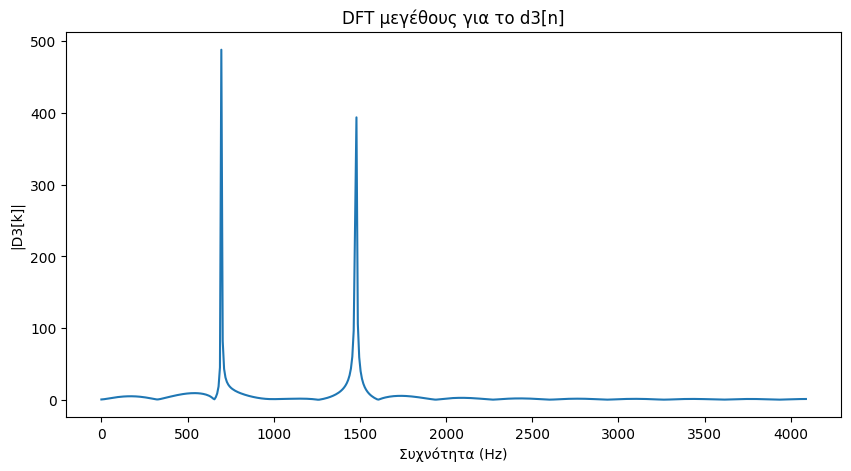

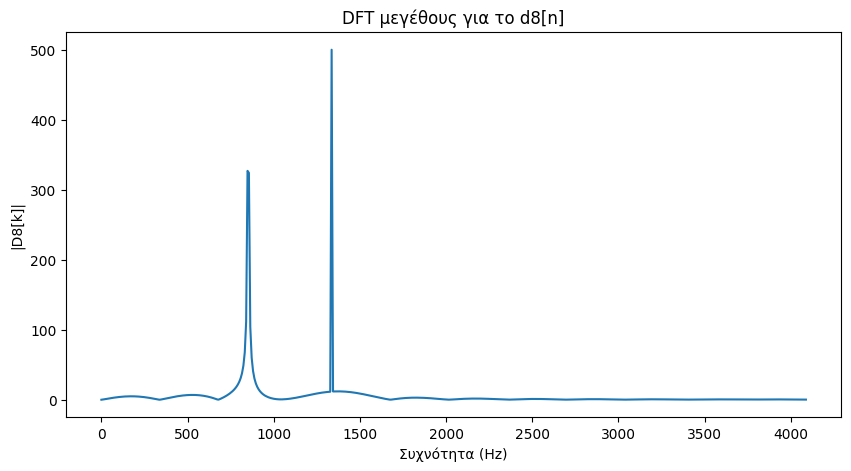

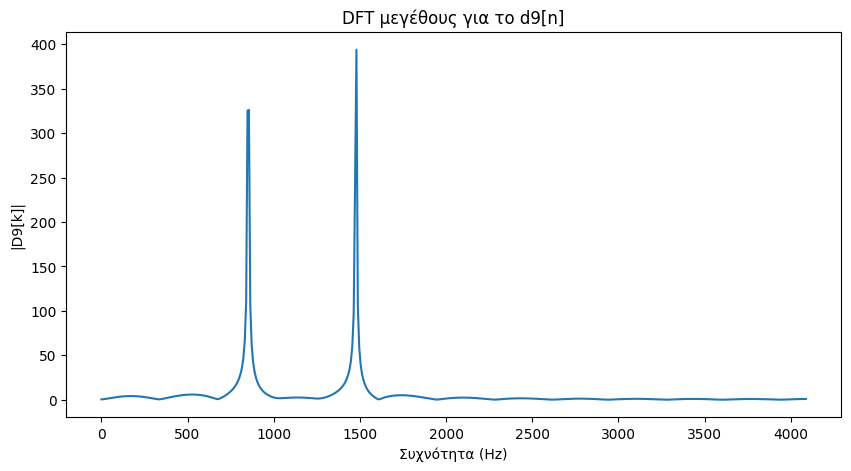

In [7]:
# Σχεδίαση (ενδεικτικά μέχρι τη μέση του φάσματος, καθώς N_fft=1024)
freq_axis = np.arange(N_fft) * Fs / N_fft

plt.figure(figsize=(10,5))
plt.title("DFT μεγέθους για το d3[n]")
plt.plot(freq_axis[:N_fft//2], magD3[:N_fft//2])
plt.xlabel("Συχνότητα (Hz)")
plt.ylabel("|D3[k]|")
plt.show()

plt.figure(figsize=(10,5))
plt.title("DFT μεγέθους για το d8[n]")
plt.plot(freq_axis[:N_fft//2], magD8[:N_fft//2])
plt.xlabel("Συχνότητα (Hz)")
plt.ylabel("|D8[k]|")
plt.show()

plt.figure(figsize=(10,5))
plt.title("DFT μεγέθους για το d9[n]")
plt.plot(freq_axis[:N_fft//2], magD9[:N_fft//2])
plt.xlabel("Συχνότητα (Hz)")
plt.ylabel("|D9[k]|")
plt.show()


In [8]:
# Σχόλιο/Παρατήρηση:
# Βλέπουμε δύο κύριες κορυφές στα φάσματα, οι οποίες αντιστοιχούν στις δύο ημιτονικές συνιστώσες.
# Έτσι προσδιορίζουμε ότι κάθε τόνος προκύπτει από άθροισμα δύο σημάτων (low freq - row, high freq - column).

Ερώτημα 1.3: Δημιουργία ακολουθίας τόνων από άθροισμα ψηφίων ΑΜ

In [9]:
AM1 = 3122039
AM2 = 3122111
sumAM = AM1 + AM2

digits_sumAM = list(map(int, str(sumAM)))
gap = np.zeros(100) # Διαχωριστικό μεταξύ τόνων: 100 μηδενικά

# Δημιουργούμε την ακολουθία
tone_sequence = []
for d in digits_sumAM:
    tone_sequence.append( generate_tone(d) )
    tone_sequence.append( gap )
# Ενώνουμε σε ένα μονοδιάστατο array
tone_sequence = np.concatenate(tone_sequence)
# Αποθήκευση σε αρχείο .wav
sf.write("tone_sequence.wav", tone_sequence, Fs)
display(Audio(tone_sequence, rate=Fs))



Ερώτημα 1.4: Υπολογισμός FFT στα παραθυροποιημένα σήματα (L=1000),
              (i) ορθογωνικό παράθυρο, (ii) Hamming

In [10]:
# Στην ακολουθία που δημιουργήθηκε στο 1.3, ο κάθε τόνος έχει μήκος 1000 δείγματα
# και παρεμβάλλονται 100 μηδενικά. Μπορούμε άμεσα να πάρουμε τα τμήματα των τόνων.

# Εντοπίζουμε τα τμήματα-τόνους στο "tone_sequence"
# (θεωρούμε ότι οι τόνοι είναι back-to-back: 1000 δείγματα τόνος, 100 δείγματα κενό, κ.ο.κ.)

# Συναρτήσεις παραθύρων
rect_window = np.ones(N_tone)
hamming_window = np.hamming(N_tone)

In [11]:
# Χρήσιμη συνάρτηση για οπτική σύγκριση των φασμάτων
def plot_magnitude_spectrum(signal, win, fftlen=1024, fs=8192, title=""):
    """Υπολογίζει fft(signal*win) και σχεδιάζει |X[k]|."""
    xw = signal * win
    X = np.fft.fft(xw, fftlen)
    magX = np.abs(X)
    faxis = np.arange(fftlen) * fs / fftlen
    
    plt.figure(figsize=(8,4))
    plt.title(title)
    plt.plot(faxis[:fftlen//2], magX[:fftlen//2])
    plt.xlabel("Συχνότητα (Hz)")
    plt.ylabel("Μέγεθος FFT")
    plt.show()

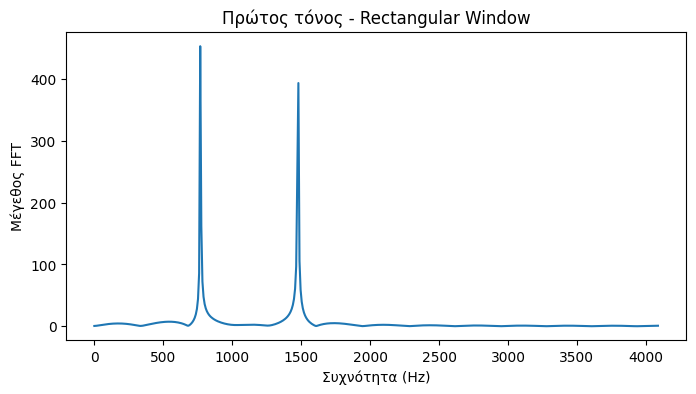

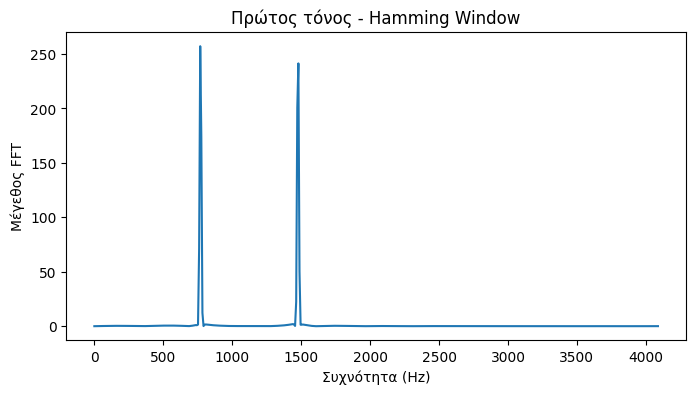

In [12]:
segments = []
idx = 0
for d in digits_sumAM:
    segment = tone_sequence[idx : idx + N_tone]
    segments.append(segment)
    idx += N_tone + 100  # προχωράμε 1000 δείγματα + 100 κενά

# Παράδειγμα υπολογισμού FFT για τον πρώτο τόνο με ορθογωνικό και Hamming παράθυρο
first_tone = segments[0]

plot_magnitude_spectrum(first_tone, rect_window, fftlen=N_fft, 
                        fs=Fs, 
                        title="Πρώτος τόνος - Rectangular Window")

plot_magnitude_spectrum(first_tone, hamming_window, fftlen=N_fft, 
                        fs=Fs, 
                        title="Πρώτος τόνος - Hamming Window")

In [13]:
# Με το Hamming window παρατηρούμε πιο "ομαλά" φάσματα (μικρότερη φασματική διαρροή),
# ενώ το ορθογωνικό παράθυρο αναδεικνύει περισσότερο side-lobes κλπ.

Ερώτημα 1.5: Εύρεση k και αντιστοίχων συχνοτήτων πλησιέστερων στις touch-tone συχνότητες

In [14]:
# Οι διακριτές συχνότητες που ψάχνουμε (για Fs=8192) είναι:
target_freqs = [0.5346, 0.5906, 0.6535, 0.7217, 0.9273, 1.0247, 1.1328] 
# Αυτές είναι οι ακτινικές (digital radian freq). Αν θέλουμε αντίστοιχα σε Hz,
# θυμόμαστε ότι Ω = 2π*f/Fs => f = (Ω * Fs) / (2π).
# Όμως στην εκφώνηση οι αριθμοί 0.5346 κλπ. αναφέρονται ως "discrete frequencies" = ω = 2π*(f/Fs).
# Για να βρούμε ποιο k αντιστοιχεί σε ω, έχουμε ω = 2π * (k / N) => k = (ω*N)/(2π).

def find_closest_bins(target_omegas, N=1024):
    indices = []
    for om in target_omegas:
        k_approx = (om * N) / (2 * np.pi)
        k_int = int(round(k_approx))
        indices.append((om, k_int))
    return indices
closest_bins = find_closest_bins(target_freqs, N=N_fft)

print("Υπολογισμός κοντινότερων δεικτών k για τις δοθείσες διακριτές συχνότητες:")
for om, k_idx in closest_bins:
    print(f"ω={om:.4f},  k≈{k_idx},  f_est={k_idx*Fs/N_fft:.2f} Hz")


Υπολογισμός κοντινότερων δεικτών k για τις δοθείσες διακριτές συχνότητες:
ω=0.5346,  k≈87,  f_est=696.00 Hz
ω=0.5906,  k≈96,  f_est=768.00 Hz
ω=0.6535,  k≈107,  f_est=856.00 Hz
ω=0.7217,  k≈118,  f_est=944.00 Hz
ω=0.9273,  k≈151,  f_est=1208.00 Hz
ω=1.0247,  k≈167,  f_est=1336.00 Hz
ω=1.1328,  k≈185,  f_est=1480.00 Hz


Ερώτημα 1.6: Συνάρτηση ttdecode() για αυτόματο εντοπισμό ψηφίων

In [15]:
# Βήματα:
# (1) Διαχωρίζουμε το σήμα σε τμήματα τόνων (μήκους 1000) αγνοώντας τα μηδενικά
# (2) Υπολογίζουμε FFT και την ενέργεια |X[k]|^2
# (3) Βρίσκουμε τις δύο κορυφές στο φάσμα
# (4) Χαρτογραφούμε τις δύο κορυφές στις row/col συχνότητες
# (5) Επιστρέφουμε το αντίστοιχο ψηφίο

In [16]:
# Ετοιμάζουμε δομές δεδομένων:
digits_map = {
    (0.5346, 0.9273): '1',
    (0.5346, 1.0247): '2',
    (0.5346, 1.1328): '3',
    (0.5906, 0.9273): '4',
    (0.5906, 1.0247): '5',
    (0.5906, 1.1328): '6',
    (0.6535, 0.9273): '7',
    (0.6535, 1.0247): '8',
    (0.6535, 1.1328): '9',
    (0.7217, 1.0247): '0'
}
row_list = [0.5346, 0.5906, 0.6535, 0.7217]
col_list = [0.9273, 1.0247, 1.1328]


In [17]:
def closest_freq(peak_om, freq_list):
    """
    Επιστρέφει ποια συχνότητα (ω) στη λίστα freq_list
    είναι η πλησιέστερη στο peak_om.
    """
    return min(freq_list, key=lambda x: abs(x - peak_om))

def detect_digit(peak_1, peak_2):
    """
    Δεδομένων των δύο κορυφών peak_1, peak_2 (ακτινικές συχνότητες ω),
    βρίσκουμε ποια είναι row και ποια col, και γυρίζουμε το ψηφίο.
    """
    # Βρίσκουμε την κοντινότερη row για τη μία κορυφή και την κοντινότερη col για την άλλη.
    # Στην πράξη, ξεχωρίζουμε ποια είναι "χαμηλότερη" συχνότητα (ανήκει στο row_list)
    # και ποια είναι "υψηλότερη" συχνότητα (ανήκει στο col_list).
    # Εναλλακτικά, βρίσκουμε ποια ταιριάζει καλύτερα στο row_list κλπ.

    # Ταξινόμηση ώστε peak_low < peak_high
    low_om, high_om = sorted([peak_1, peak_2])

    # Κοντινότερη από τις row_list
    row_om = closest_freq(low_om, row_list)
    # Κοντινότερη από τις col_list
    col_om = closest_freq(high_om, col_list)

    # Αναζητούμε το ψηφίο στο λεξικό
    if (row_om, col_om) in digits_map:
        return digits_map[(row_om, col_om)]
    else:
        return '?'

In [18]:
def ttdecode(signal_in, fs=8192, tone_len=1000, gap_len=100):
    """
    Διαβάζει ένα σήμα με "πακεταρισμένους" τηλεφωνικούς τόνους (μήκους tone_len),
    χωρισμένους από gap_len δείγματα μηδενικά.
    Επιστρέφει ένα string με τα αναγνωρισμένα ψηφία.
    """
    # Εντοπισμός τμημάτων τόνων (υποθέτουμε ότι οι τόνοι είναι ακριβώς tone_len + gap_len)
    # Προσπαθούμε να "σκανάρουμε" το σήμα, αγνοώντας "άδεια" σημεία.
    
    # Για απλότητα, υποθέτουμε ότι οι τόνοι είναι συνεχείς: tone(1000) + gap(100) + tone(1000)+ ...
    # Πρέπει να βρούμε πόσα πλήρη τμήματα χωράνε.
    total_len = len(signal_in)
    
    # Αριθμός πιθανών τόνων:
    # (tone_len + gap_len) * numTones <= total_len
    # Θα πάρουμε όσους χωράνε "ολοκληρωμένους".
    
    # Για γενικότητα, μπορούμε να ψάξουμε για μη μηδενικά κομμάτια ενδιάμεσα,
    # αλλά εδώ κάνουμε την εκφώνηση κατά γράμμα.
    
    indices = []
    start_idx = 0
    while (start_idx + tone_len) <= total_len:
        segment = signal_in[start_idx : start_idx + tone_len]
        # Ελέγχουμε αν το segment έχει ενέργεια πάνω από κάποιο ελάχιστο thresh
        if np.sum(segment**2) > 1e-10:
            indices.append(start_idx)
        start_idx += tone_len + gap_len
    
    decoded_digits = []
    for idx in indices:
        seg = signal_in[idx : idx + tone_len]
        # FFT
        X = np.fft.fft(seg, 1024)
        # Ενέργεια = |X[k]|^2
        X_energy = np.abs(X)**2
        # Βρίσκουμε τις δύο μέγιστες κορυφές
        # Αποφεύγουμε το συμμετρικό κομμάτι πέρα από N/2, για να μην έχουμε διπλές κορυφές.
        half_len = 1024 // 2
        # Στο DFT zero-bin & DC ίσως αμελητέα σε τόνους, αλλά το αφήνουμε ή βάζουμε ένα cutoff
        # Βρίσκουμε k1, k2 που μεγιστοποιούν
        k_peaks = np.argsort(X_energy[:half_len])[-2:]  # οι δύο μεγαλύτεροι
        k1, k2 = k_peaks[0], k_peaks[1]
        
        # Μετατρέπουμε k -> ω = 2π * (k / N)
        om1 = 2 * np.pi * (k1 / 1024)
        om2 = 2 * np.pi * (k2 / 1024)
        
        digit = detect_digit(om1, om2)
        decoded_digits.append(digit)
    
    return "".join(decoded_digits)

In [19]:
def detect_digit_from_segment(seg_time_domain, N_fft=1024):
    """
    Δέχεται τα 1000 δείγματα ενός τόνου,
    υπολογίζει FFT και εντοπίζει τις δύο κυρίαρχες συχνότητες.
    Επιστρέφει το αναγνωρισμένο ψηφίο (ή '?').
    """
    X = np.fft.fft(seg_time_domain, N_fft)
    X_energy = np.abs(X)**2
    half_len = N_fft // 2

    # Εύρεση δύο μεγαλύτερων peak στο [0 : N_fft//2]
    k_peaks = np.argsort(X_energy[:half_len])[-2:]
    k1, k2 = k_peaks
    
    # Μετατροπή σε ακτινική συχνότητα ω = 2π*(k/N_fft)
    om1 = 2*np.pi*(k1 / N_fft)
    om2 = 2*np.pi*(k2 / N_fft)

    return detect_digit(om1, om2)

In [20]:
def ttdecode_variable_gap(signal_in, fs=8192, tone_len=1000, energy_thresh=1e-5):
    """
    Εντοπίζει και αποκωδικοποιεί τους τηλεφωνικούς τόνους (μήκους tone_len)
    από ένα σήμα που περιέχει πολλούς τόνους χωρισμένους από κενά, αλλά
    το μήκος των κενών ΔΕΝ είναι σταθερό.

    Λογική:
      - Σαρώνουμε το σήμα δείγμα προς δείγμα.
      - Όταν τοπικό τμήμα του σήματος (π.χ. 10-20 δείγματα) ξεπερνά το energy_thresh,
        θεωρούμε ότι βρήκαμε την έναρξη ενός τόνου.
      - Παίρνουμε ακριβώς tone_len δείγματα και τα αποκωδικοποιούμε σε ψηφίο.
      - Κάνουμε skip αυτά τα tone_len δείγματα και συνεχίζουμε τη σάρωση κ.ο.κ.

    Επιστρέφει: decoded_digits (string) με τα αναγνωρισμένα ψηφία.
    """
    N = len(signal_in)
    idx = 0
    decoded_digits = []

    check_size = 2  # μικρό παράθυρο για έλεγχο ενέργειας

    while idx < N:
        # Ελέγχουμε ένα τοπικό τμήμα μήκους check_size (20 δείγματα)
        # για να δούμε εάν η ενέργεια υπερβαίνει το threshold
        if idx + check_size > N:
            break  # φτάσαμε στο τέλος σήματος

        local_seg = signal_in[idx : idx + check_size]
        local_energy = np.sum(local_seg**2)

        if local_energy > energy_thresh:
            # => Εντοπίστηκε έναρξη τόνου
            # Παίρνουμε τα επόμενα 1000 δείγματα σαν τόνο
            if idx + tone_len > N:
                # αν δεν έχουμε αρκετά δείγματα μέχρι το τέλος,
                # δεν μπορούμε να πάρουμε πλήρη τόνο
                break

            tone_segment = signal_in[idx : idx + tone_len]

            # Αποκωδικοποίηση ψηφίου:
            digit_found = detect_digit_from_segment(tone_segment)
            decoded_digits.append(digit_found)

            # Κάνουμε skip τα 1000 δείγματα
            idx += tone_len
        else:
            # Είμαστε σε χαμηλή ενέργεια (κενό), προχωράμε κατά 1 δείγμα
            idx += 1

    return "".join(decoded_digits)

In [21]:
# Δοκιμή για το σήμα "tone_sequence.wav" που δημιουργήσαμε
# Φορτώνουμε από αρχείο

In [22]:
tone_seq_loaded, _ = sf.read("tone_sequence.wav")
decoded_str = ttdecode(tone_seq_loaded, fs=Fs, tone_len=1000, gap_len=100)
print("Αποτέλεσμα ttdecode() από το tone_sequence.wav:", decoded_str)

#Αρα είμαστε ευχαριστημένοι

Αποτέλεσμα ttdecode() από το tone_sequence.wav: 6244150


 Ερώτημα 1.7: Φόρτωση και αναγνώριση των easy_sig, medium_sig, hard_sig

In [26]:
easy_sig = np.load("dsp25_lab1_Data/easy_sig.npy")
medium_sig = np.load("dsp25_lab1_Data/medium_sig.npy")
hard_sig = np.load("dsp25_lab1_Data/hard_sig.npy")

decoded_easy = ttdecode(easy_sig, fs=Fs, tone_len=1000, gap_len=100)
decoded_med  = ttdecode_variable_gap(medium_sig, fs=Fs,  tone_len=1000, energy_thresh=1e-5)
decoded_hard = ttdecode_variable_gap(hard_sig, fs=Fs,  tone_len=1000, energy_thresh=1e-1)

print("easy_sig ->", decoded_easy)
print("medium_sig ->", decoded_med)
print("hard_sig ->", decoded_hard)

display(Audio(easy_sig, rate=Fs))
display(Audio(medium_sig, rate=Fs))
display(Audio(hard_sig, rate=Fs))

easy_sig -> 20136515
medium_sig -> 4748011820
hard_sig -> 0360937304
